In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X = iris[:,0:2]

### 1 Clustering, 45 points

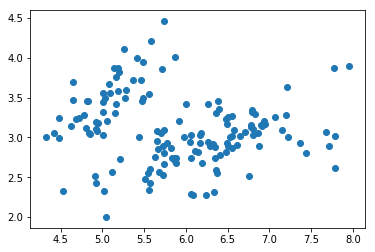

In [2]:
# 1.1
plt.scatter(X[:,0],X[:,1])
plt.show()

# I think there might be 4 clusters here.

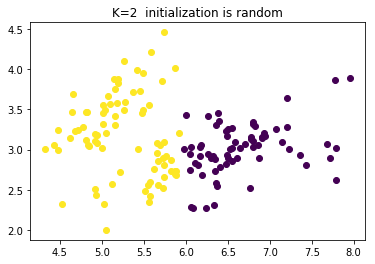

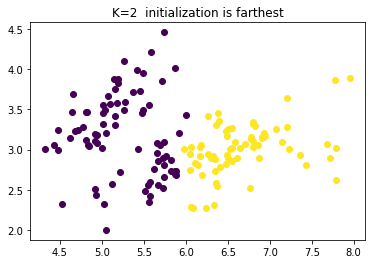

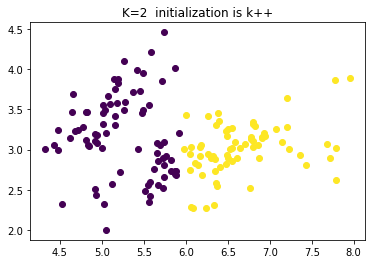

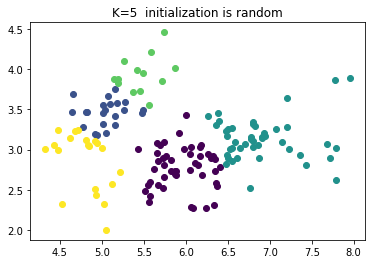

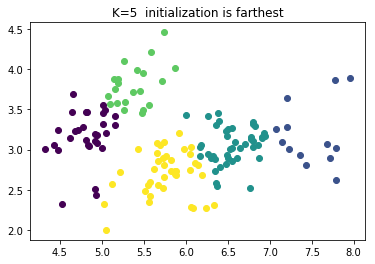

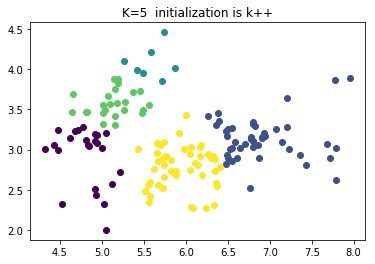

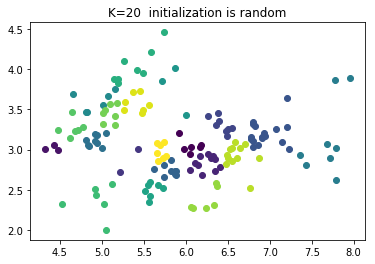

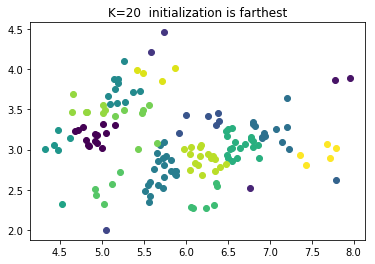

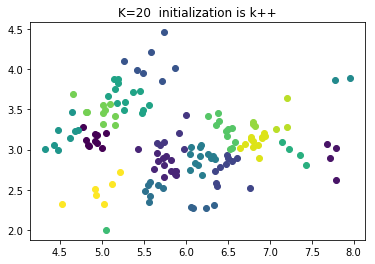

In [3]:
# 1.2
kmeans = [2, 5, 20]
inits = ['random', 'farthest', 'k++']

min_sumd = 0
min_z = np.zeros(0)
min_k = 0
min_init = ""

for k in kmeans:
    for i in inits:
        z, c, sumd = ml.cluster.kmeans(X, k, i)
        ml.plotClassify2D(None, X, z)
        plt.title("K=" + str(k) + "  initialization is " + i)
        plt.show()

# k = 20 and initialization is k++ is the best so far

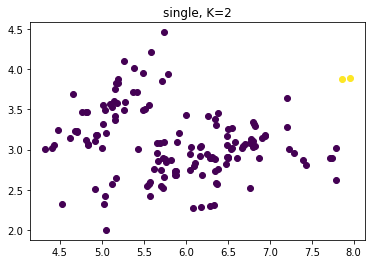

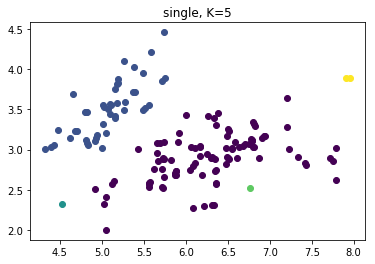

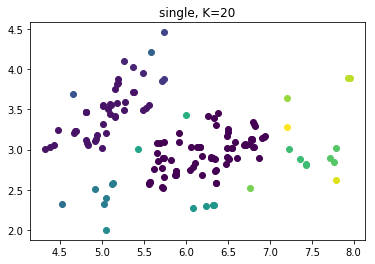

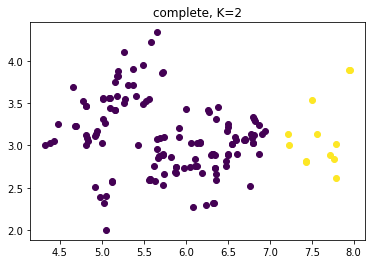

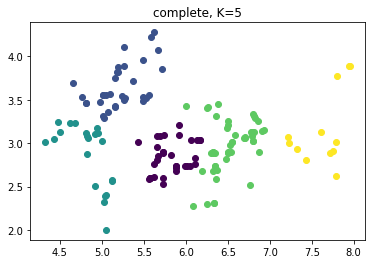

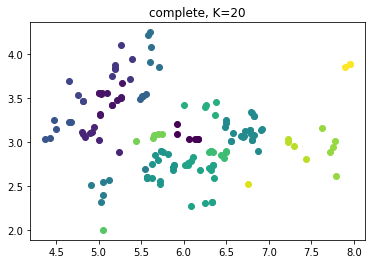

In [4]:
# 1.3
for k in kmeans:
    z, join = ml.cluster.agglomerative(X, k, method="min")
    ml.plotClassify2D(None, X, z)
    plt.title("single, K=" + str(k))
    plt.show()
    
for k in kmeans:
    z, join = ml.cluster.agglomerative(X, k, method="max")
    ml.plotClassify2D(None, X, z)
    plt.title("complete, K=" + str(k))
    plt.show()

#### 1.4
The kmeans algorithms is very straight forward but the preformance dependents on the initialization. So we always need to use a lot of different initialization to make conclusions. But the agglomerative cluster algorithm do not need initialize, it will build a tree based on the distance. And each point is a class itself, and we can use the distance with the neighbors to merge points to the same class. But the problem is that there might be some extreme points which will have negative effects on the merging. So we need to find a appropriate threshold to decrease the effect.

### 2 EigenFaces, 50 points

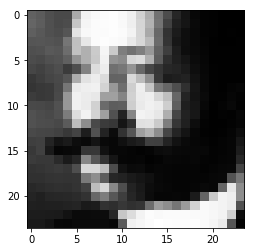

In [5]:
from scipy.linalg import svd
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset

def draw(X):
    plt.figure()
    # pick a data point i for display
    img = np.reshape(X,(24,24)) # convert vectorized data to 24x24 image patches
    plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
    
draw(X[0,:])

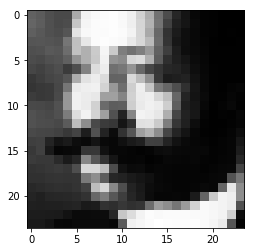

In [6]:
# 2.1
mean = np.mean(X)
X_0 = X - mean

draw(X_0[0,:])

In [7]:
# 2.2
U, S, Vh = svd(X_0, full_matrices=False)
W = U.dot(np.diag(S))
print("W shape is : ",W.shape)
print("Vh shape is: ",Vh.shape)

W shape is :  (4916, 576)
Vh shape is:  (576, 576)


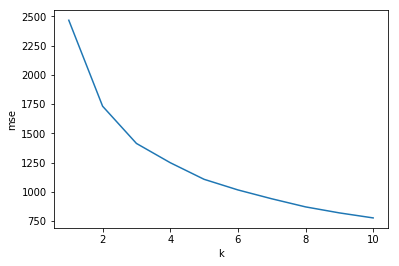

In [8]:
# 2.3
klist = range(1,11)
error = []

for k in klist: 
    X_pre = np.dot(W[:,:k],Vh[:k,:])
    error.append(np.mean((X_0 - X_pre)**2))
    
plt.plot(klist, error)
plt.xlabel('k')
plt.ylabel('mse')
plt.show()

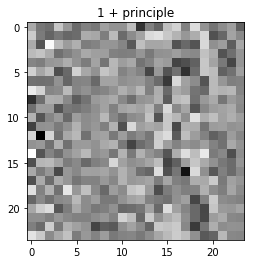

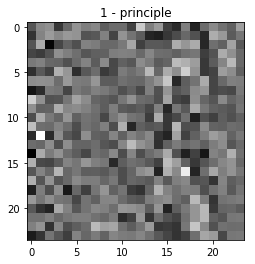

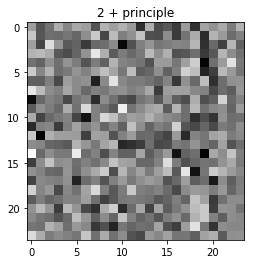

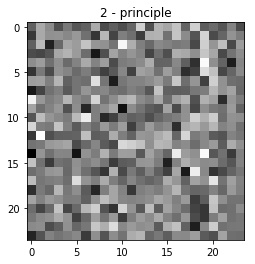

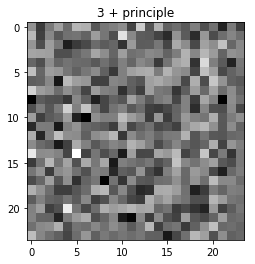

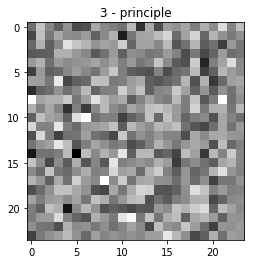

In [9]:
# 2.4
for k in range(1,4):
    alpha = 2*np.median(abs(W[:,k]))
    img_p = np.reshape(mean + alpha*Vh[:,k], (24,24))
    plt.imshow(img_p.T, cmap="gray")
    plt.title(str(k) + " + principle")
    plt.show()
    img_m = np.reshape(mean - alpha*Vh[:,k], (24,24))
    plt.imshow(img_m.T, cmap="gray")
    plt.title(str(k) + " - principle")
    plt.show()

    

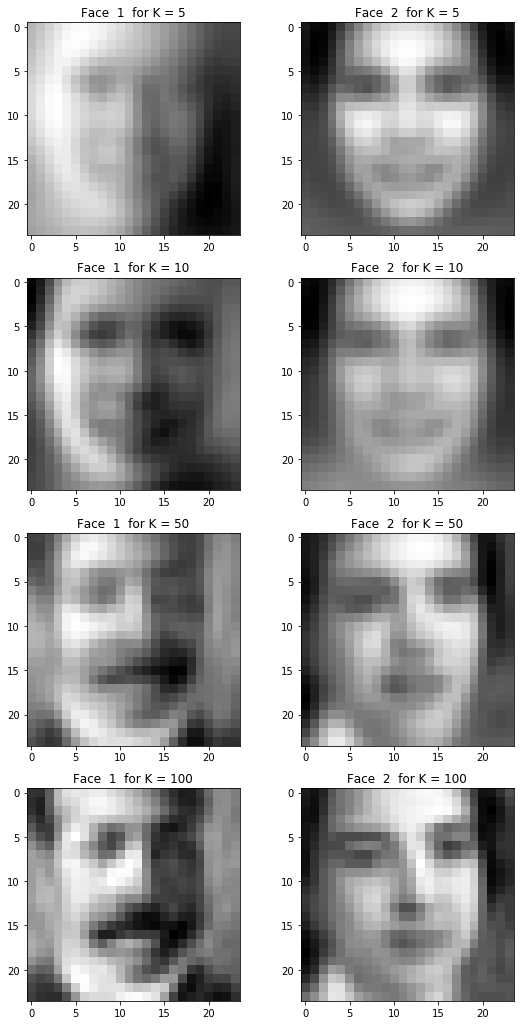

In [10]:
# 2.5
klist = [5,10,50,100]
dlist = [1, 2]

f, ax = plt.subplots(4, 2, figsize=(9, 18))

for i,k in enumerate(klist):
    for j,d in enumerate(dlist):
        X_pred = W[:,:k].dot(Vh[:k,:])
        img = np.reshape(X_pred[d,:],(24,24))
        ax[i][j].imshow(img.T, cmap="gray")
        ax[i][j].set_title("Face  " + str(d) +  "  for K = " + str(k))

plt.show()


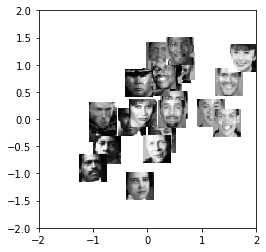

In [11]:
# 2.6
coord, params = ml.transforms.rescale(W[:,0:2]) # normalize scale of "W" locations
plt.figure(); plt.hold(True); # you may need this for pyplot
for i in range(0, 25):
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0], coord[i,0]+0.5, coord[i,1], coord[i,1]+0.5)
    img = np.reshape(X[i,:], (24,24)) # reshape to square
    plt.imshow(img.T, cmap="gray", extent=loc) # draw each image
    plt.axis((-2,2,-2,2)) # set axis to a reasonable scale

### Statement of Collaboration (5 points)

I did my homework independently.